In [33]:
#!/usr/bin/python
#coding=utf-8
import numpy as np
import pandas as pd
from openpyxl import load_workbook
from xlrd import open_workbook
import csv
from csv import reader
import re
import os
from matplotlib import pyplot
from matplotlib import style
style.use("ggplot")
#%matplotlib notebook
import sys
import operator
import datetime
import time
import matplotlib.pyplot as plt
from datetime import timedelta

In [34]:
def diffdates(d1, d2):
    #Date format: %Y-%m-%d %H:%M:%S
    return (time.mktime(time.strptime(d2,'%Y-%m-%d %H:%M:%S')) - time.mktime(time.strptime(d1,'%Y-%m-%d %H:%M:%S')))

In [35]:
filename1 = 'weather_data.xlsx'
df = pd.read_excel(filename1, sheetname='weather_data')
#df = df[df.IdentNo.str[-2:] == "_G"]

In [36]:
df = df.values
a,b = df.shape

In [37]:
final_array = []
total_size = 0
for i in range(a):
    if (df[i][6] == 200 or df[i][6] == 201 or df[i][6] == 210 or df[i][6] == 211):
        df[i][6] = 211
        df[i][7] = 'Thunderstorm'
        df[i][8] = 'thunderstorm'
        
    if (df[i][6] == 503 or df[i][6] == 501 or df[i][6] == 502):
        df[i][6] = 501
        df[i][7] = 'Rain'
        df[i][8] = 'moderate rain'
    if (df[i][6] == 300 or df[i][6] == 301):
        df[i][6] = 301
        df[i][7] = 'Drizzle'
        df[i][8] = 'drizzle'
    if i == 0:
        final_array.append([])
        final_array[total_size].append(df[i][6])
        final_array[total_size].append(1)
        final_array[total_size].append(df[i][7])
        final_array[total_size].append(df[i][8])
        total_size = 1
    else:
        size_array = len(final_array)
        flag = 0
        for j in range(size_array):
            if (final_array[j][0] == df[i][6]):
                final_array[j][1] += 1
                flag = 1
                break
        if (flag == 1):
            continue
        final_array.append([])
        final_array[total_size].append(df[i][6])
        final_array[total_size].append(1)
        final_array[total_size].append(df[i][7])
        final_array[total_size].append(df[i][8])
        total_size += 1
print (type(final_array))
print (final_array)
print (len(final_array))

A = np.array(final_array)

A1 = A[:,0] # returns the third columm
A1 = A1.tolist()
A1 = list(map(int, A1))

A2 = A[:,1]
A2 = A2.tolist()
A2 = list(map(int, A2))

A3 = A[:,2]
A4 = A[:,3]

<class 'list'>
[[721, 23573, 'Haze', 'haze'], [800, 5594, 'Clear', 'sky is clear'], [802, 1950, 'Clouds', 'scattered clouds'], [801, 1472, 'Clouds', 'few clouds'], [761, 666, 'Dust', 'dust'], [211, 369, 'Thunderstorm', 'thunderstorm'], [803, 750, 'Clouds', 'broken clouds'], [804, 375, 'Clouds', 'overcast clouds'], [500, 839, 'Rain', 'light rain'], [741, 262, 'Fog', 'fog'], [701, 2375, 'Mist', 'mist'], [501, 419, 'Rain', 'moderate rain'], [301, 252, 'Drizzle', 'drizzle'], [711, 3063, 'Smoke', 'smoke']]
14


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


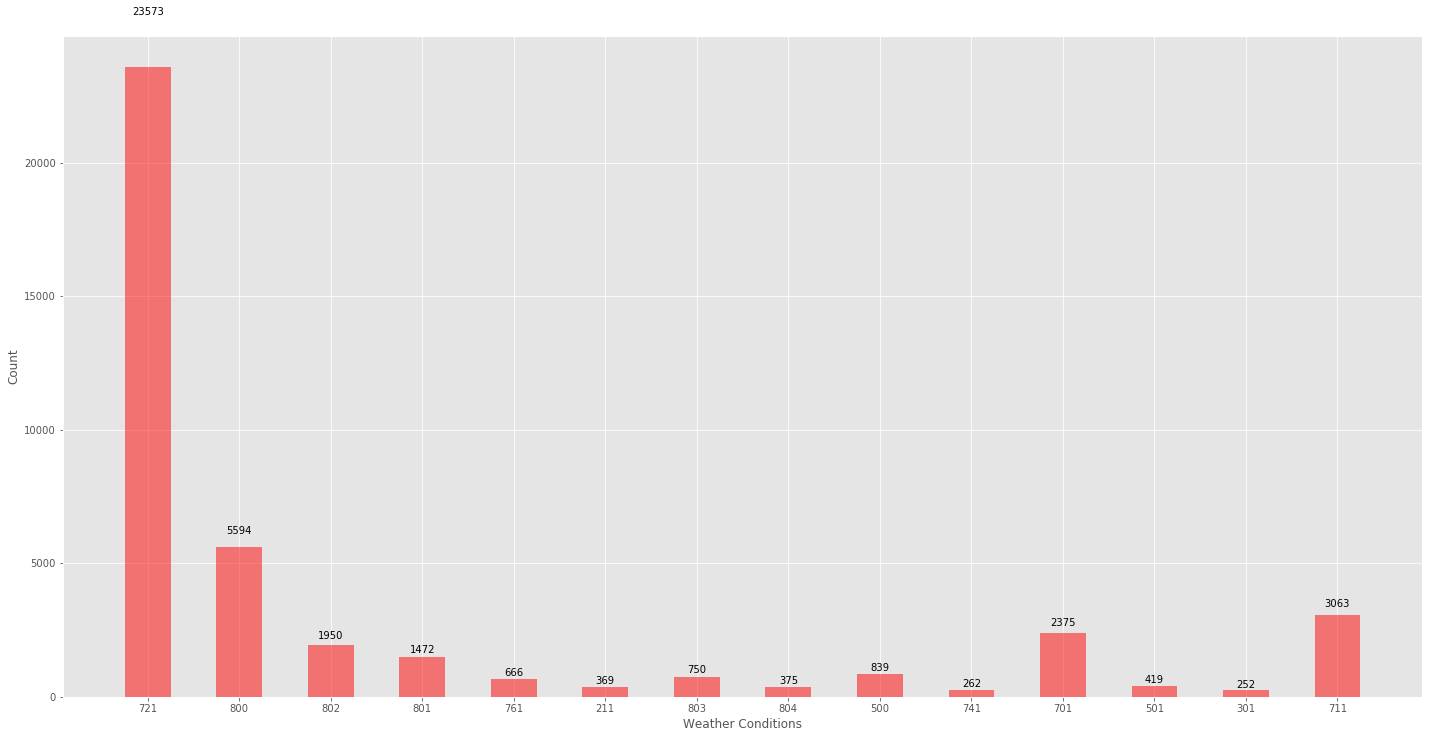

In [38]:
width = 0.5
y_pos = np.arange(len(final_array))
fig, ax = plt.subplots(figsize=(20, 10))
rects = ax.bar(y_pos, A2, width ,color='r', align='edge' ,alpha=0.5)
ax.set_xticks(y_pos + width/2.)
ax.set_xticklabels(A1, fontsize=10)
ax.set_xlabel('Weather Conditions')
ax.set_ylabel('Count')
plt.legend()

def autolabel(rects,ii):
    for rect in rects:
        height = rect.get_height()
        values = A3[ii]
        values1 = A4[ii]
        values2 = A2[ii]
        ii += 1
        '''
        ax.text(rect.get_x() + rect.get_width()/2., 1.08*height,
                '%s & %s' %(str(values), str(values1)),
                ha='center', va='bottom', fontsize=10)
        '''
        ax.text(rect.get_x() + rect.get_width()/2., 1.08*height,
                '%s' %(str(values2)),
                ha='center', va='bottom', fontsize=10)
autolabel(rects, 0)
plt.tight_layout()
plt.show()

In [39]:
A5 = list(zip(A1, A3, A4,A2))
df1 = pd.DataFrame(A5)
print (df1)

      0             1                 2      3
0   721          Haze              haze  23573
1   800         Clear      sky is clear   5594
2   802        Clouds  scattered clouds   1950
3   801        Clouds        few clouds   1472
4   761          Dust              dust    666
5   211  Thunderstorm      thunderstorm    369
6   803        Clouds     broken clouds    750
7   804        Clouds   overcast clouds    375
8   500          Rain        light rain    839
9   741           Fog               fog    262
10  701          Mist              mist   2375
11  501          Rain     moderate rain    419
12  301       Drizzle           drizzle    252
13  711         Smoke             smoke   3063


In [40]:
print (df)

[[1367539200 '2013-05-03 00:00:00 +0000 UTC' 298.15 ..., 721 'Haze' 'haze']
 [1367542800 '2013-05-03 01:00:00 +0000 UTC' 299.15 ..., 721 'Haze' 'haze']
 [1367546400 '2013-05-03 02:00:00 +0000 UTC' 303.15 ..., 721 'Haze' 'haze']
 ..., 
 [1531087200 '2018-07-08 22:00:00 +0000 UTC' 308.15 ..., 721 'Haze' 'haze']
 [1531090800 '2018-07-08 23:00:00 +0000 UTC' 307.15 ..., 721 'Haze' 'haze']
 [1531094400 '2018-07-09 00:00:00 +0000 UTC' 307.15 ..., 721 'Haze' 'haze']]


In [41]:
np.savetxt("weather_processed.csv", df, fmt="%s", delimiter=",")
#weather_processed.xlsx

In [42]:
filename2 = 'weather_processed.xlsx'
df = pd.read_excel(filename2, sheetname='weather_processed')
df['dt_iso'] = df['dt_iso'].astype(str).str[:-10]
df['dt_iso'] = pd.to_datetime(df['dt_iso'])
df['dt_iso'] = df['dt_iso'] + timedelta(hours=5, minutes=30)
print (df)
filepath = 'weather_processed_corrected.xlsx'
df.to_excel(filepath, index=False)

               dt              dt_iso    temp  pressure  humidity  wind_speed  \
0      1367539200 2013-05-03 05:30:00  298.15      1005        17           0   
1      1367542800 2013-05-03 06:30:00  299.15      1005        24           1   
2      1367546400 2013-05-03 07:30:00  303.15      1006         0           1   
3      1367550000 2013-05-03 08:30:00  305.15      1006        11           2   
4      1367553600 2013-05-03 09:30:00  306.15      1006        10           3   
5      1367557200 2013-05-03 10:30:00  307.15      1006         8           4   
6      1367560800 2013-05-03 11:30:00  308.15      1006         8           5   
7      1367564400 2013-05-03 12:30:00  310.15      1005         6           5   
8      1367568000 2013-05-03 13:30:00  310.15      1004         5           4   
9      1367571600 2013-05-03 14:30:00  310.15      1004         5           3   
10     1367575200 2013-05-03 15:30:00  310.15      1003         5           6   
11     1367578800 2013-05-03